# The Behavioral Risk Factor Data on Tobacco Use

The Behavioral Risk Factor Data on Tobacco Use (2010 and Prior), provided by the Centers for Disease Control and Prevention (CDC), offers insights into tobacco use patterns in the U.S. from data collected through the State Tobacco Activities Tracking and Evaluation (STATE) System and the Behavioral Risk Factor Surveillance System (BRFSS) surveys, spanning from 1996 to 2010.

The BRFSS is a state-based, continuous surveillance system that gathers data on modifiable risk factors for chronic diseases and other major causes of death. The data from the STATE System, which was derived from the BRFSS surveys, focuses on key tobacco-related topics, such as:

* Cigarette smoking status (whether individuals currently smoke, have smoked, or have never smoked).
* Cigarette smoking prevalence across different demographic groups (age, gender, race/ethnicity, etc.).
* The frequency of cigarette smoking among those who smoke.
* The frequency and success of quit attempts by smokers.


Importantly, this data should not be compared to BRFSS data collected from 2011 onward, as the survey methodologies were altered after that year.

Source Attribution: Centers for Disease Control and Prevention, Data.gov.

1. Import all the important libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Upload the data set under the variable 'tobdata'

In [3]:
tobdata= pd.read_csv("Tobacco use -1969-2010.csv")

3. Display the dataset

In [4]:
print(tobdata)

       YEAR LocationAbbr LocationDesc                       TopicDesc  \
0      2010           AL      Alabama              Cessation (Adults)   
1      2010           AL      Alabama          Cigarette Use (Adults)   
2      2010           AL      Alabama          Cigarette Use (Adults)   
3      2010           AL      Alabama          Cigarette Use (Adults)   
4      2010           AL      Alabama          Cigarette Use (Adults)   
...     ...          ...          ...                             ...   
38045  1996           WY      Wyoming  Cigarette Consumption (Adults)   
38046  1996           WY      Wyoming  Cigarette Consumption (Adults)   
38047  1996           WY      Wyoming  Cigarette Consumption (Adults)   
38048  1996           WY      Wyoming  Cigarette Consumption (Adults)   
38049  1996           WY      Wyoming              Cessation (Adults)   

                  Response         MeasureDesc  Data_Value(%)  Sample_Size  \
0                      NaN        Quit Smokin

In [5]:
tobdata.head()

,YEAR,LocationAbbr,LocationDesc,TopicDesc,Response,MeasureDesc,Data_Value(%),Sample_Size,Gender,Race,Age,Education,DataSource
0,2010,AL,Alabama,Cessation (Adults),NaN,Quit Smoking,53.3,659.0,Female,All Races,All Ages,All Grades,BRFSS
1,2010,AL,Alabama,Cigarette Use (Adults),NaN,Occasional smoker,18.7,5234.0,Female,All Races,All Ages,All Grades,BRFSS
2,2010,AL,Alabama,Cigarette Use (Adults),NaN,Occasional smoker,18.6,1197.0,Female,All Races,18 to 44 Years,All Grades,BRFSS
3,2010,AL,Alabama,Cigarette Use (Adults),NaN,Occasional smoker,21.5,5349.0,Female,White,All Ages,All Grades,BRFSS
4,2010,AL,Alabama,Cigarette Use (Adults),NaN,Occasional smoker,21.8,104.0,Female,Hispanic,All Ages,All Grades,BRFSS


In [6]:
tobdata.tail()

,YEAR,LocationAbbr,LocationDesc,TopicDesc,Response,MeasureDesc,Data_Value(%),Sample_Size,Gender,Race,Age,Education,DataSource
38045,1996,WY,Wyoming,Cigarette Consumption (Adults),15 to 25 Cigarettes,Smoking addict,54.0,207.0,Male,All Races,All Ages,All Grades,BRFSS
38046,1996,WY,Wyoming,Cigarette Consumption (Adults),> 25 Cigarettes,Smoking addict,28.2,207.0,Male,All Races,All Ages,All Grades,BRFSS
38047,1996,WY,Wyoming,Cigarette Consumption (Adults),> 25 Cigarettes,Smoking addict,20.8,516.0,Male,All Races,All Ages,All Grades,BRFSS
38048,1996,WY,Wyoming,Cigarette Consumption (Adults),> 25 Cigarettes,Smoking addict,13.9,309.0,Female,All Races,All Ages,All Grades,BRFSS
38049,1996,WY,Wyoming,Cessation (Adults),NaN,Quit Smoking,55.4,579.0,Male,All Races,All Ages,All Grades,BRFSS


In [7]:
###to check the size of the dataset
print(tobdata.shape)

(38050, 13)


3. Data Cleaning

In [8]:
###To check the null value, datatype, number of columns and number of rows.
tobdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38050 entries, 0 to 38049
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YEAR           38050 non-null  int64  
 1   LocationAbbr   38050 non-null  object 
 2   LocationDesc   38050 non-null  object 
 3   TopicDesc      38050 non-null  object 
 4   Response       14280 non-null  object 
 5   MeasureDesc    38050 non-null  object 
 6   Data_Value(%)  36091 non-null  float64
 7   Sample_Size    36041 non-null  float64
 8   Gender         38050 non-null  object 
 9   Race           38050 non-null  object 
 10  Age            38050 non-null  object 
 11  Education      38050 non-null  object 
 12  DataSource     38050 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 3.8+ MB


In [9]:
### To create the copy of dataset for further cleaning and updation
Ctobdata = tobdata.copy()

In [10]:
### To check the number of duplicate values
Dup = Ctobdata.duplicated().sum()
if Dup >0:
    print("There is",Dup,"Duplicate value")
else:
    print("No Duplicate value")

There is 649 Duplicate value


In [11]:
### Removing Duplicate values
Ctobdata=Ctobdata.drop_duplicates()
Dup = Ctobdata.duplicated().sum()
print("After treating duplicates, there are",Dup,"duplicate values")

After treating duplicates, there are 0 duplicate values


In [12]:
###To check the number of null values and fill the null values
Null_value=Ctobdata.isnull().sum()
print("There are",Null_value,"Null Values")
Null_mean=Ctobdata.isnull().mean() * 100
Null_mean

There are YEAR                 0
LocationAbbr         0
LocationDesc         0
TopicDesc            0
Response         23126
MeasureDesc          0
Data_Value(%)     1316
Sample_Size       1366
Gender               0
Race                 0
Age                  0
Education            0
DataSource           0
dtype: int64 Null Values


YEAR              0.000000
LocationAbbr      0.000000
LocationDesc      0.000000
TopicDesc         0.000000
Response         61.832571
MeasureDesc       0.000000
Data_Value(%)     3.518622
Sample_Size       3.652309
Gender            0.000000
Race              0.000000
Age               0.000000
Education         0.000000
DataSource        0.000000
dtype: float64

In [13]:
tob_filled = Ctobdata.fillna(0)
Ctobdata['Response']= Ctobdata['Response'].fillna(Ctobdata['Response'].mode()[0],inplace=True)
Ctobdata['Data_Value(%)'].fillna(Ctobdata['Data_Value(%)'].mean(),inplace=True)
Ctobdata['Sample_Size'].fillna(Ctobdata['Sample_Size'].mean(),inplace=True)


C:\Users\Dell\AppData\Local\Temp\ipykernel_3076\2273616756.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Ctobdata['Response']= Ctobdata['Response'].fillna(Ctobdata['Response'].mode()[0],inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_3076\2273616756.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

In [14]:
Null_value=Ctobdata.isnull().sum()
Null_value

YEAR                 0
LocationAbbr         0
LocationDesc         0
TopicDesc            0
Response         37401
MeasureDesc          0
Data_Value(%)        0
Sample_Size          0
Gender               0
Race                 0
Age                  0
Education            0
DataSource           0
dtype: int64

In [15]:
###check garbage values (unique value and its frequency)
for column in Ctobdata.select_dtypes(include="object").columns:
    print(f"{Ctobdata[column].value_counts()}\n")

LocationAbbr
WA    720
CA    720
MN    719
NV    719
AK    718
MI    718
TX    718
OK    717
FL    717
OR    716
MA    716
MD    716
NY    716
AZ    716
NJ    715
NC    715
NM    715
PA    713
RI    713
VA    713
KS    713
IN    713
WI    713
CO    712
CT    711
MO    711
LA    710
GA    709
OH    709
NE    709
SC    708
DE    708
IL    708
UT    704
AR    704
ID    703
IA    700
AL    700
DC    698
KY    697
MS    695
MT    694
NH    694
HI    693
SD    692
VT    692
WY    692
TN    690
WV    690
ND    686
ME    683
PR    600
VI    400
GU    280
US     50
Name: count, dtype: int64

LocationDesc
Washington                         720
California                         720
Minnesota                          719
Nevada                             719
Alaska                             718
Michigan                           718
Texas                              718
Oklahoma                           717
Florida                            717
Oregon                             716
Massach

In [16]:
### Cleaned dataset displayed
Ctobdata

,YEAR,LocationAbbr,LocationDesc,TopicDesc,Response,MeasureDesc,Data_Value(%),Sample_Size,Gender,Race,Age,Education,DataSource
0,2010,AL,Alabama,Cessation (Adults),None,Quit Smoking,53.3,659.0,Female,All Races,All Ages,All Grades,BRFSS
1,2010,AL,Alabama,Cigarette Use (Adults),None,Occasional smoker,18.7,5234.0,Female,All Races,All Ages,All Grades,BRFSS
2,2010,AL,Alabama,Cigarette Use (Adults),None,Occasional smoker,18.6,1197.0,Female,All Races,18 to 44 Years,All Grades,BRFSS
3,2010,AL,Alabama,Cigarette Use (Adults),None,Occasional smoker,21.5,5349.0,Female,White,All Ages,All Grades,BRFSS
4,2010,AL,Alabama,Cigarette Use (Adults),None,Occasional smoker,21.8,104.0,Female,Hispanic,All Ages,All Grades,BRFSS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38045,1996,WY,Wyoming,Cigarette Consumption (Adults),None,Smoking addict,54.0,207.0,Male,All Races,All Ages,All Grades,BRFSS
38046,1996,WY,Wyoming,Cigarette Consumption (Adults),None,Smoking addict,28.2,207.0,Male,All Races,All Ages,All Grades,BRFSS
38047,1996,WY,Wyoming,Cigarette Consumption (Adults),None,Smoking addict,20.8,516.0,Male,All Races,All Ages,All Grades,BRFSS
38048,1996,WY,Wyoming,Cigarette Consumption (Adults),None,Smoking addict,13.9,309.0,Female,All Races,All Ages,All Grades,BRFSS


In [17]:
###To check the null value, datatype, number of columns and number of rows of the cleaned dataset.
Ctobdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37401 entries, 0 to 38049
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YEAR           37401 non-null  int64  
 1   LocationAbbr   37401 non-null  object 
 2   LocationDesc   37401 non-null  object 
 3   TopicDesc      37401 non-null  object 
 4   Response       0 non-null      object 
 5   MeasureDesc    37401 non-null  object 
 6   Data_Value(%)  37401 non-null  float64
 7   Sample_Size    37401 non-null  float64
 8   Gender         37401 non-null  object 
 9   Race           37401 non-null  object 
 10  Age            37401 non-null  object 
 11  Education      37401 non-null  object 
 12  DataSource     37401 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 4.0+ MB


4. Exploratory Data Analysis(EDA)

In [20]:
### Perform the statistical analysis
Ctobdata.describe(include='number').round(2).style.background_gradient()

,YEAR,Data_Value(%),Sample_Size
count,37401.000000,37401.000000,37401.000000
mean,2002.780000,32.390000,1880.540000
std,4.360000,17.830000,2538.010000
min,1996.000000,0.000000,50.000000
25%,1999.000000,20.100000,414.000000
50%,2003.000000,26.200000,1079.000000
75%,2007.000000,44.400000,2269.000000
max,2010.000000,95.200000,42835.000000


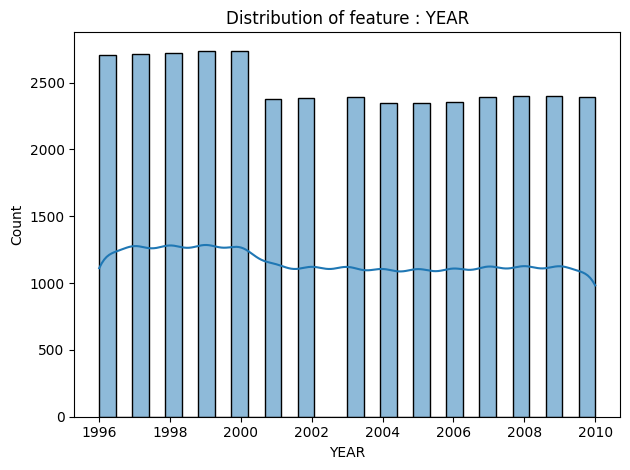

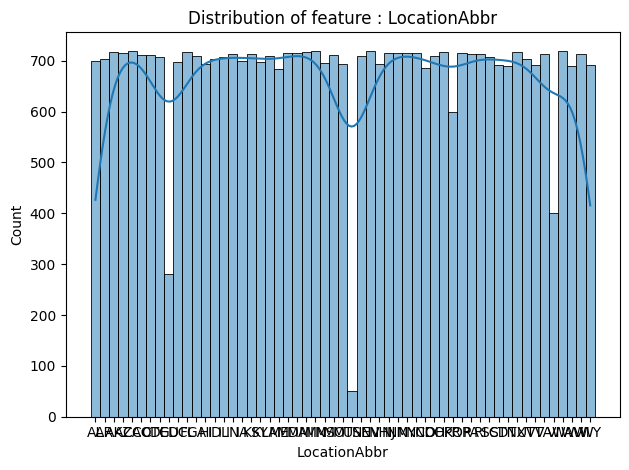

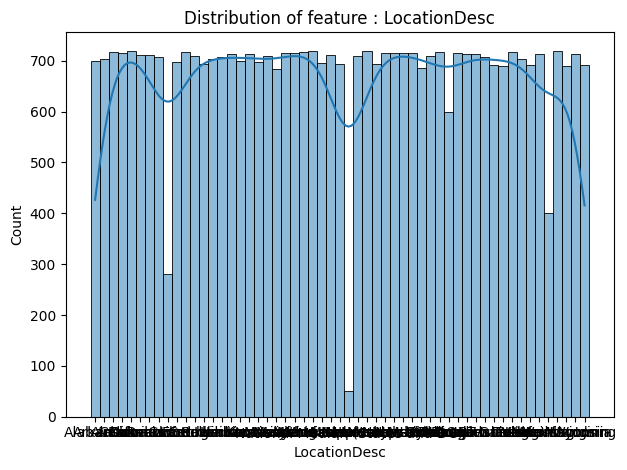

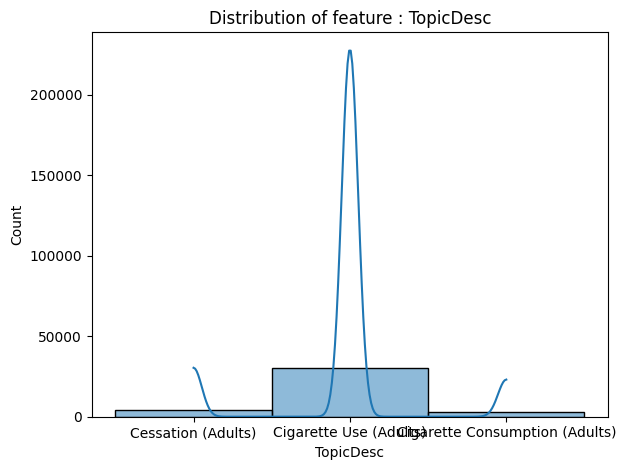

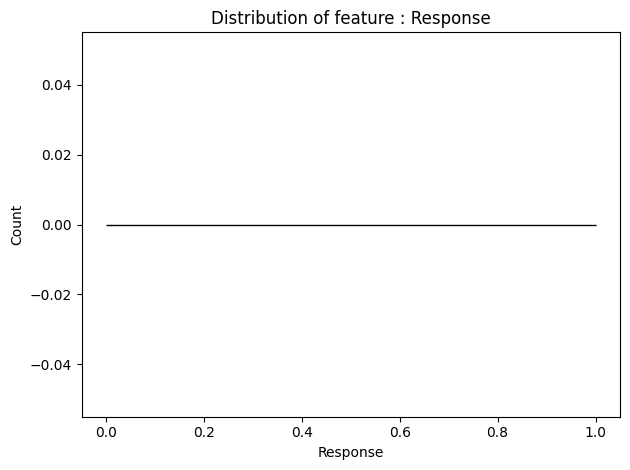

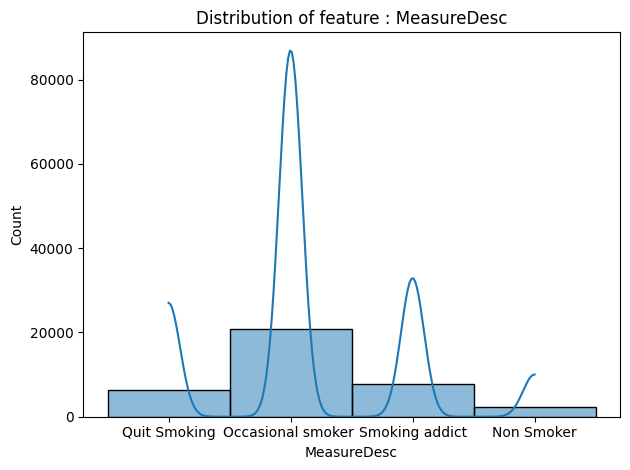

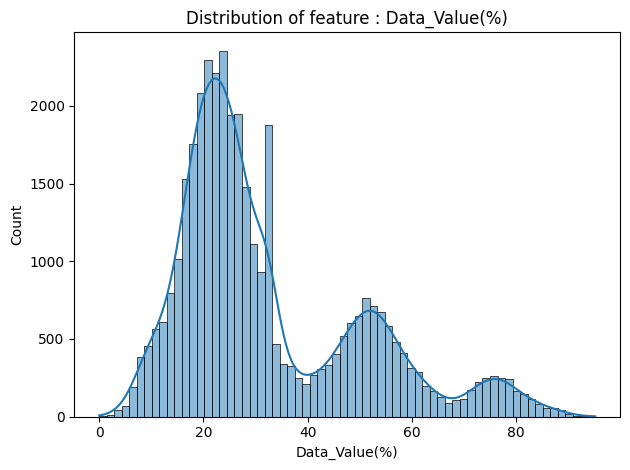

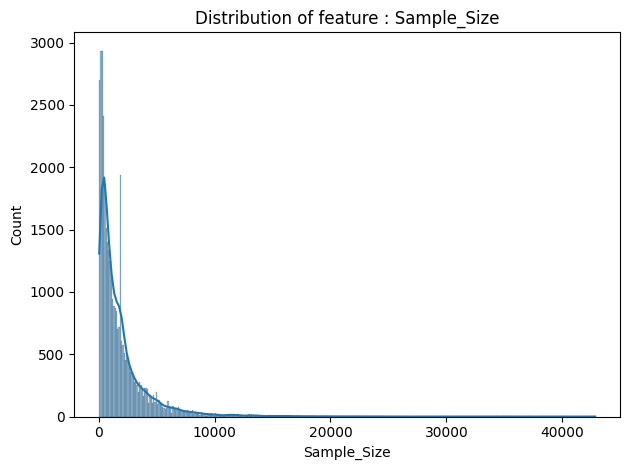

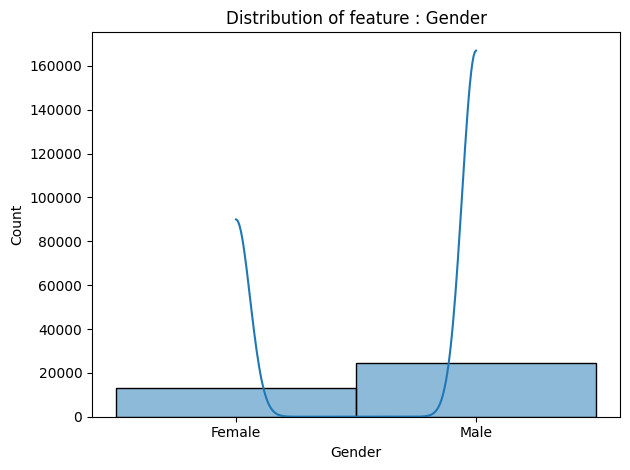

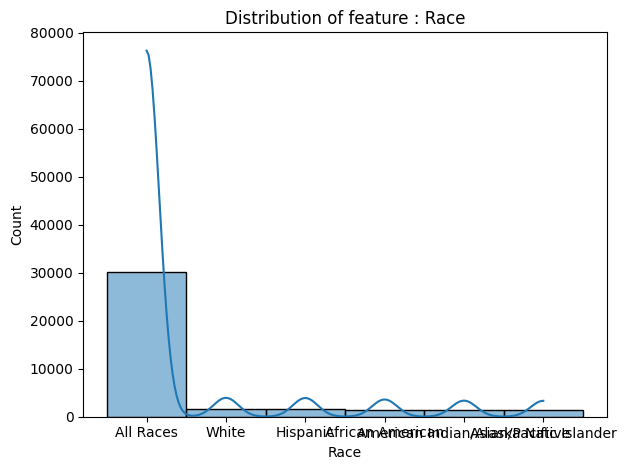

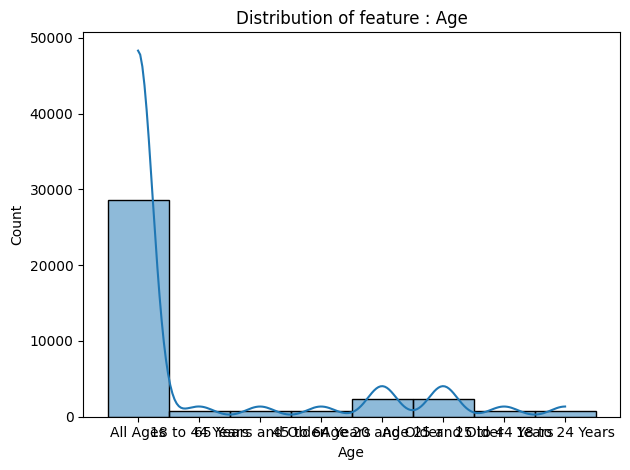

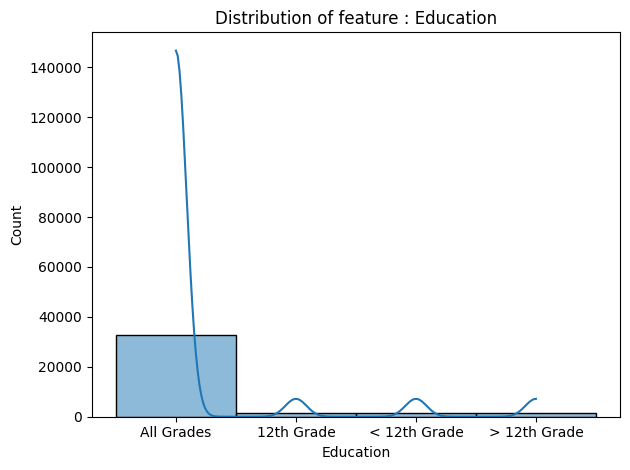

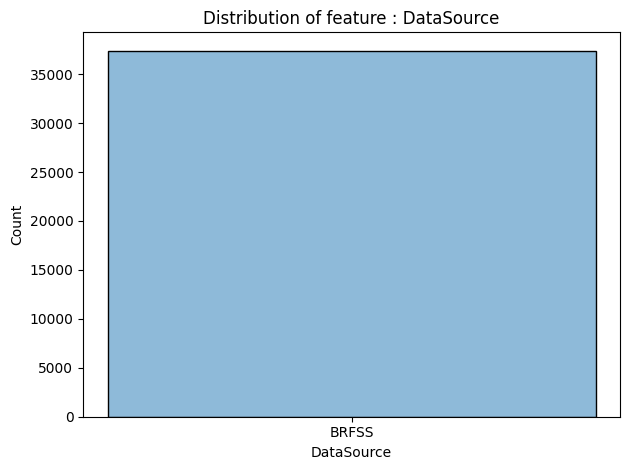

In [41]:
### to draw the histplot for every values of the columns to see distrubution of data
for column in Ctobdata.columns:
    sns.histplot(data=Ctobdata, x=column, kde=True)
    plt.title(f"Distribution of feature : {column}")
    plt.tight_layout()
    plt.show()
    print("\n")

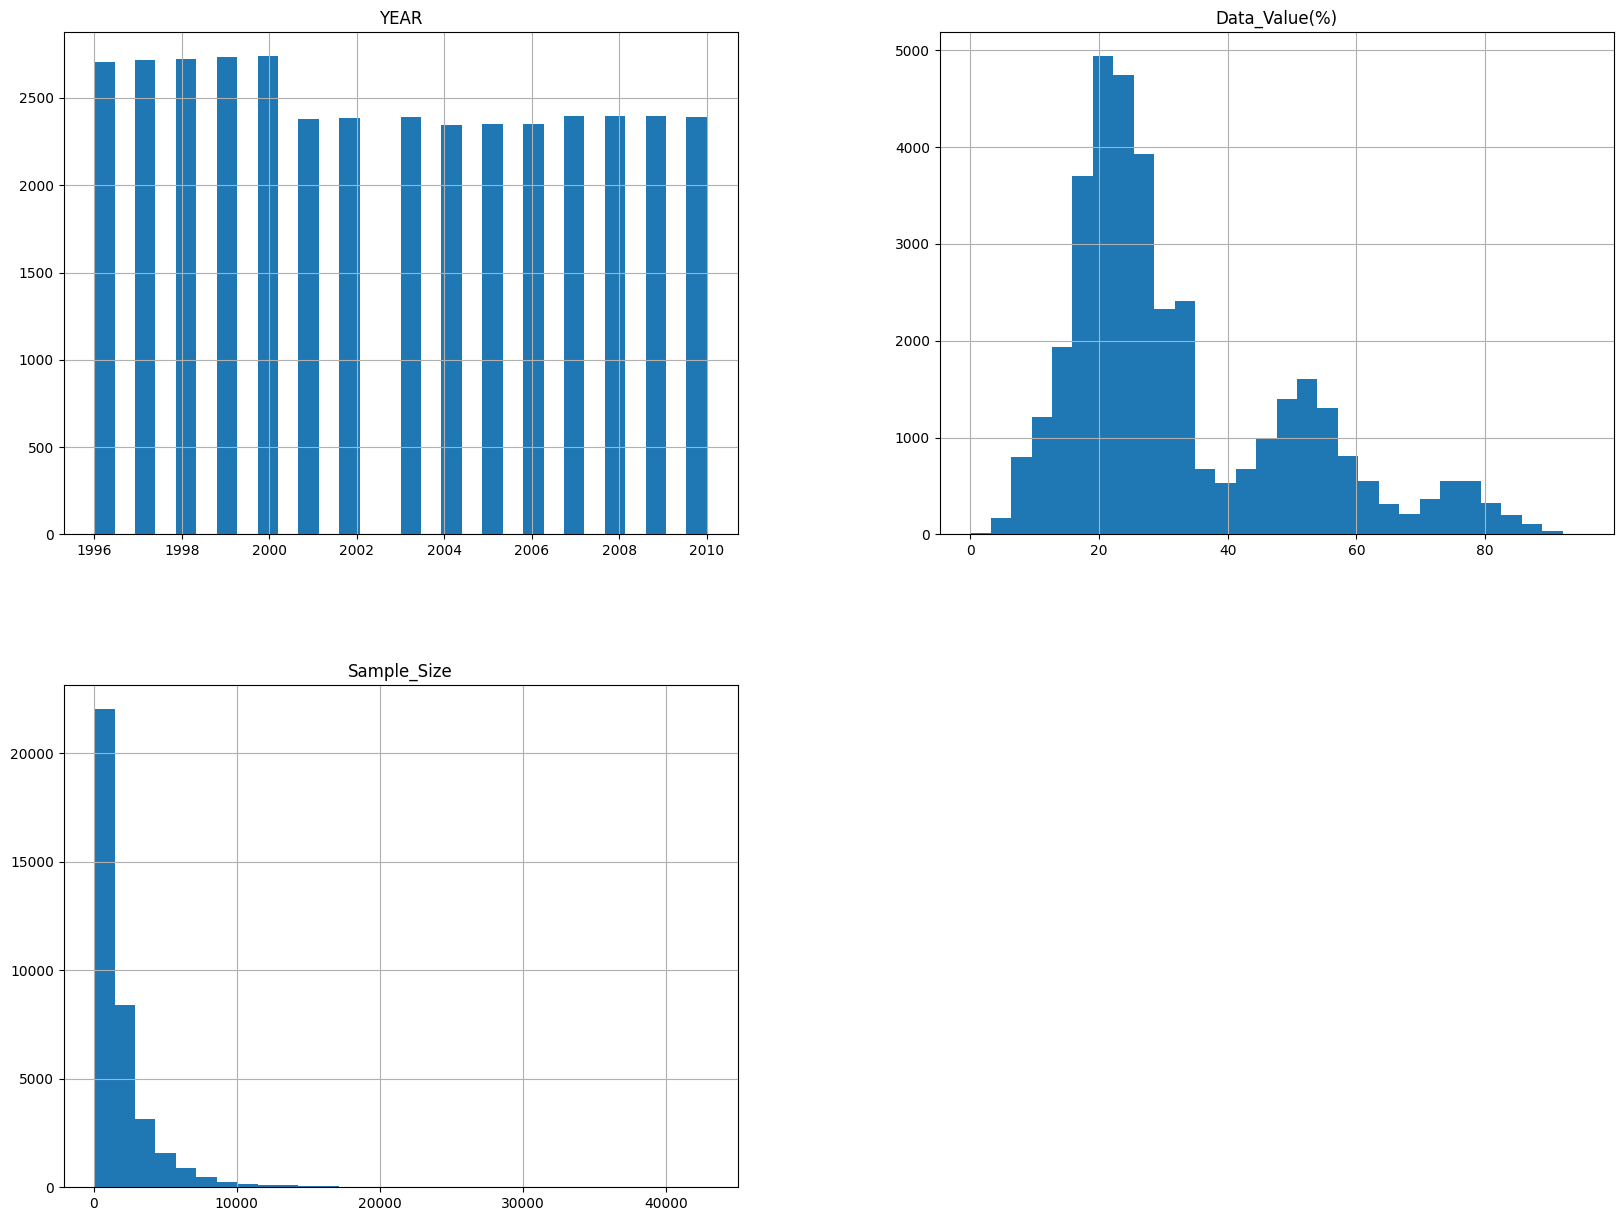

In [28]:
# To visualise the nurerical values using hisplot.
Ctobdata.hist(bins=30, figsize=(20, 15))
plt.show()

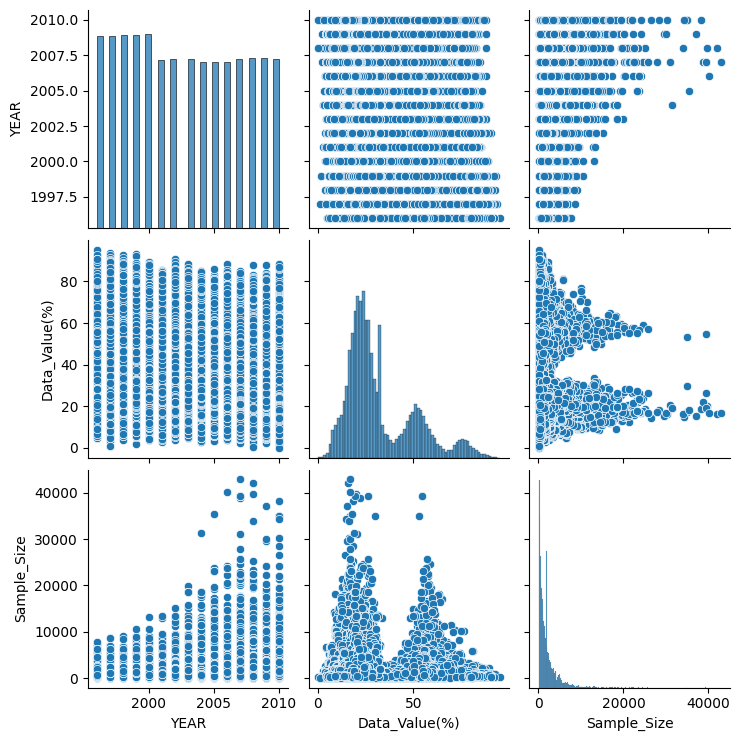

In [26]:
# To visualise the object values using pariplot.
ax = sns.pairplot(Ctobdata[Ctobdata.select_dtypes(exclude=['object']).columns])

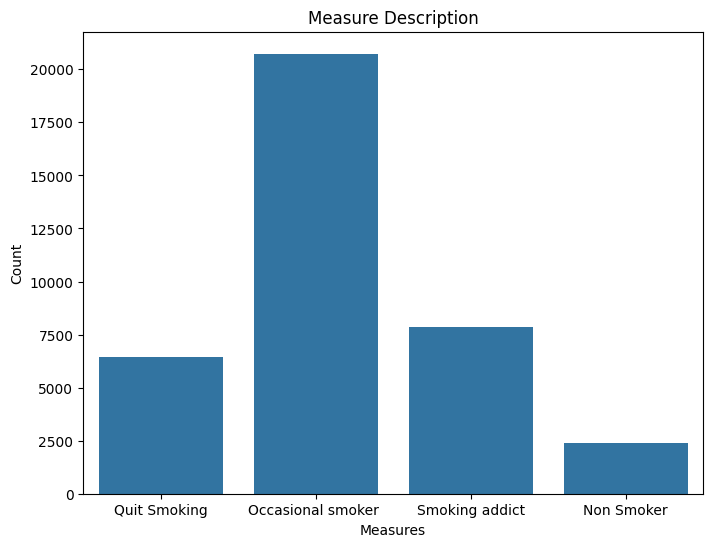

In [24]:
###To understand the target value count.
plt.figure(figsize=(8, 6))
sns.countplot(x="MeasureDesc",data=Ctobdata)
plt.title('Measure Description')
plt.xlabel('Measures')
plt.ylabel('Count')
plt.show()

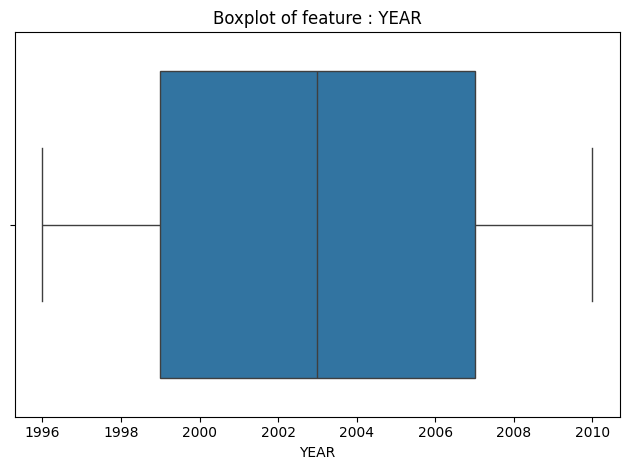

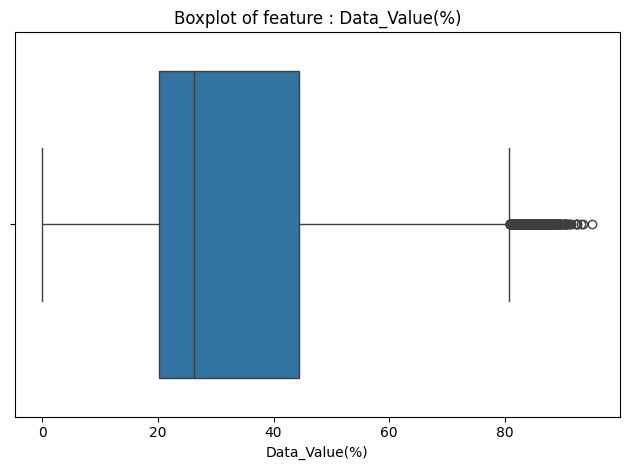

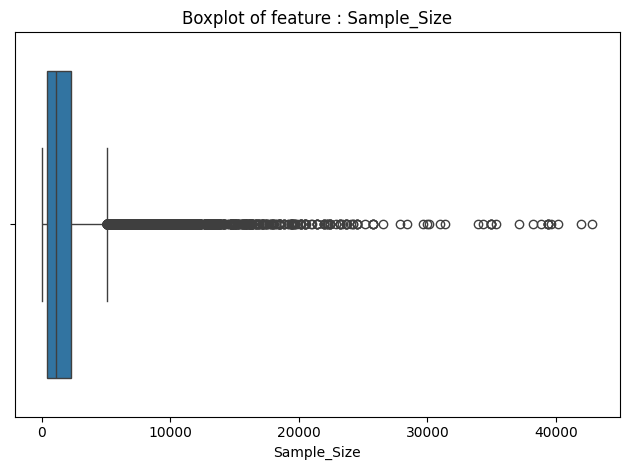

In [32]:
### Outlier detection using boxplot
for column in Ctobdata.select_dtypes(include="number").columns:
    if column == "MeasureDesc":
        continue
    sns.boxplot(data=Ctobdata, x=column)
    plt.title(f"Boxplot of feature : {column}")
    plt.tight_layout()
    plt.show()
    print("\n")

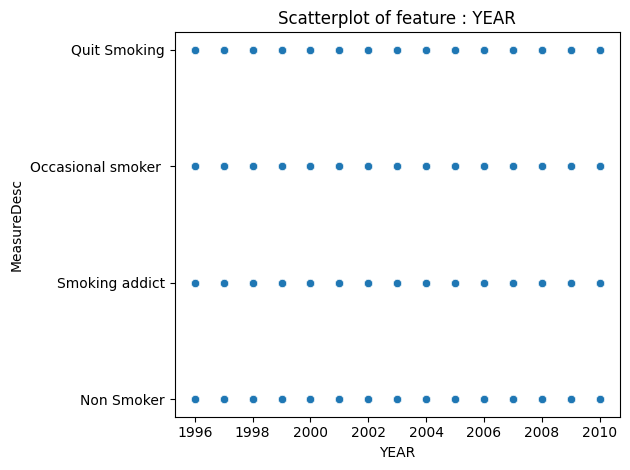

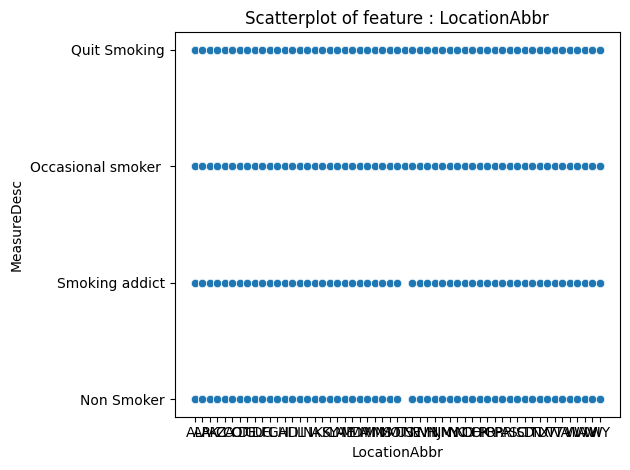

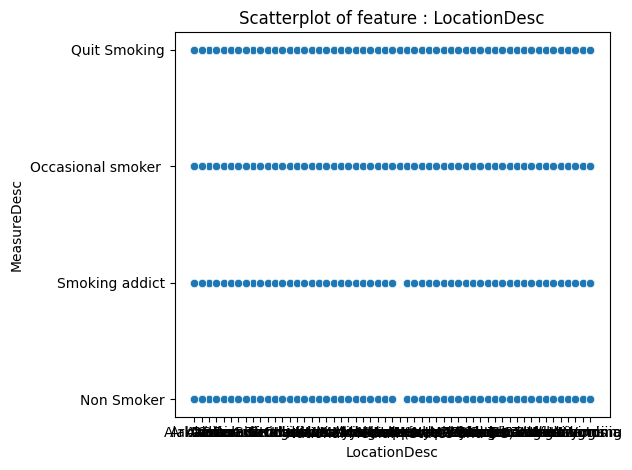

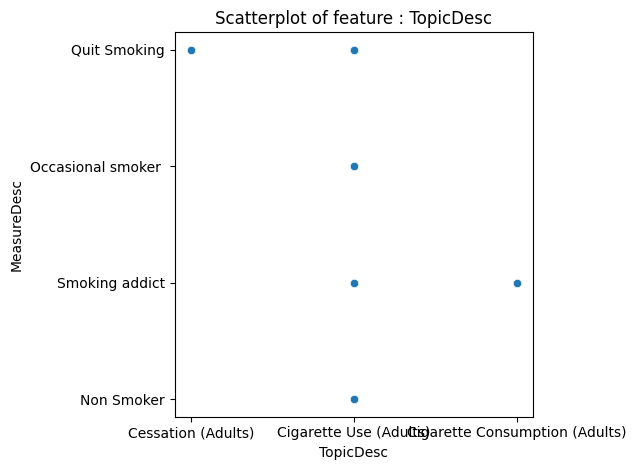

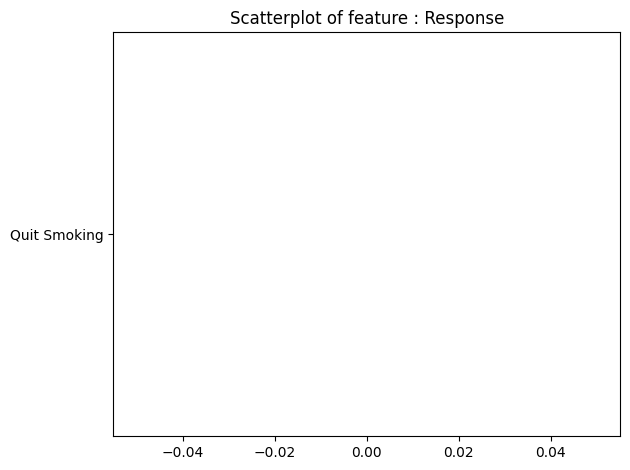

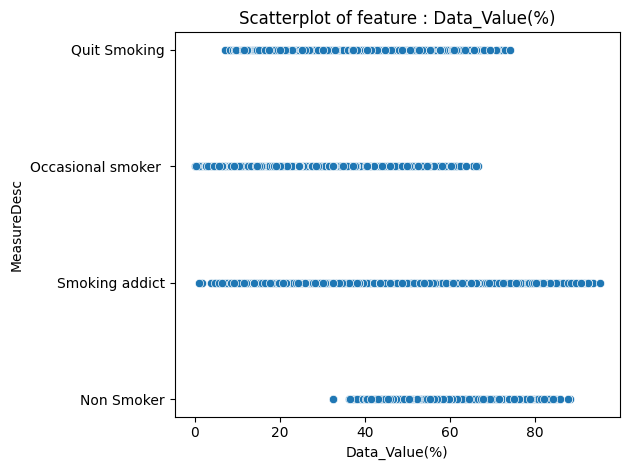

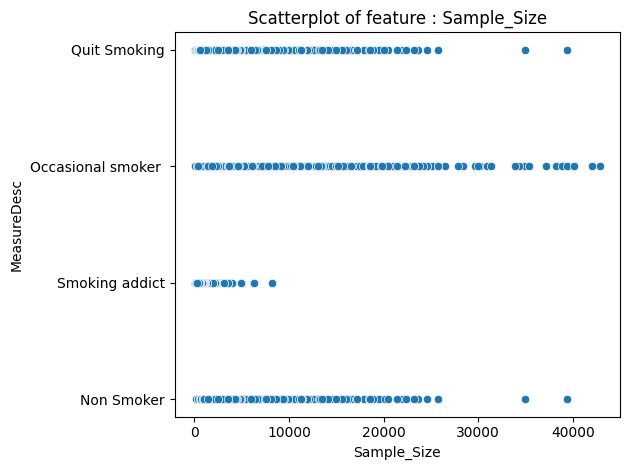

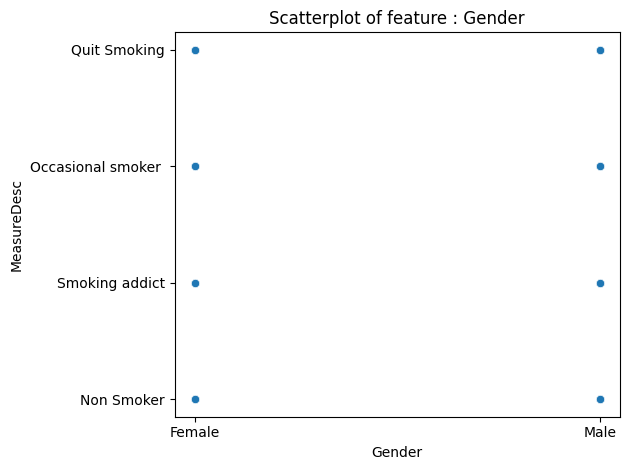

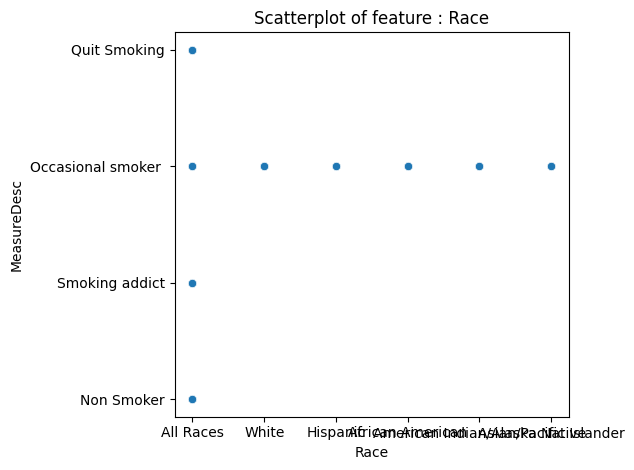

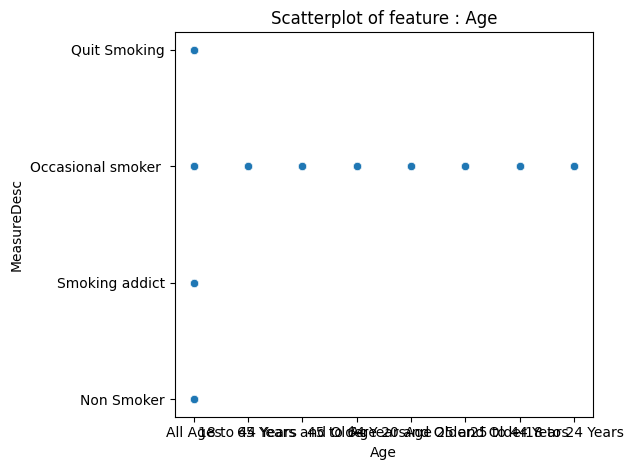

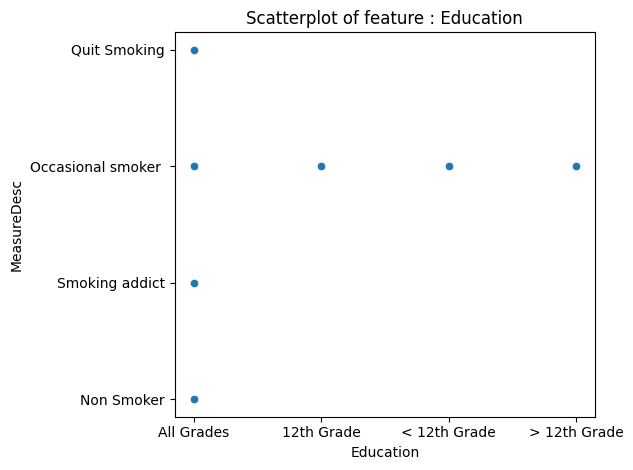

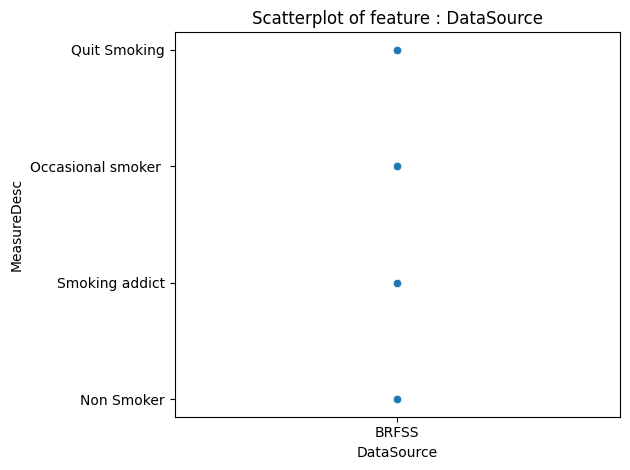

In [42]:
### To display the relation between X values and Y, where Y is tagret value ( MeasureDesc).
plt.show()

for column in Ctobdata.columns:
    if column == "MeasureDesc":
        continue
    sns.scatterplot(data=Ctobdata, x=column, y="MeasureDesc")
    plt.title(f"Scatterplot of feature : {column}")
    plt.tight_layout()
    plt.show()
    print("\n")


In [48]:
correlation_matrix = Ctobdata.select_dtypes(include="number").corr()
correlation_matrix

,YEAR,Data_Value(%),Sample_Size
YEAR,1.000000,0.008661,0.296462
Data_Value(%),0.008661,1.000000,-0.128383
Sample_Size,0.296462,-0.128383,1.000000


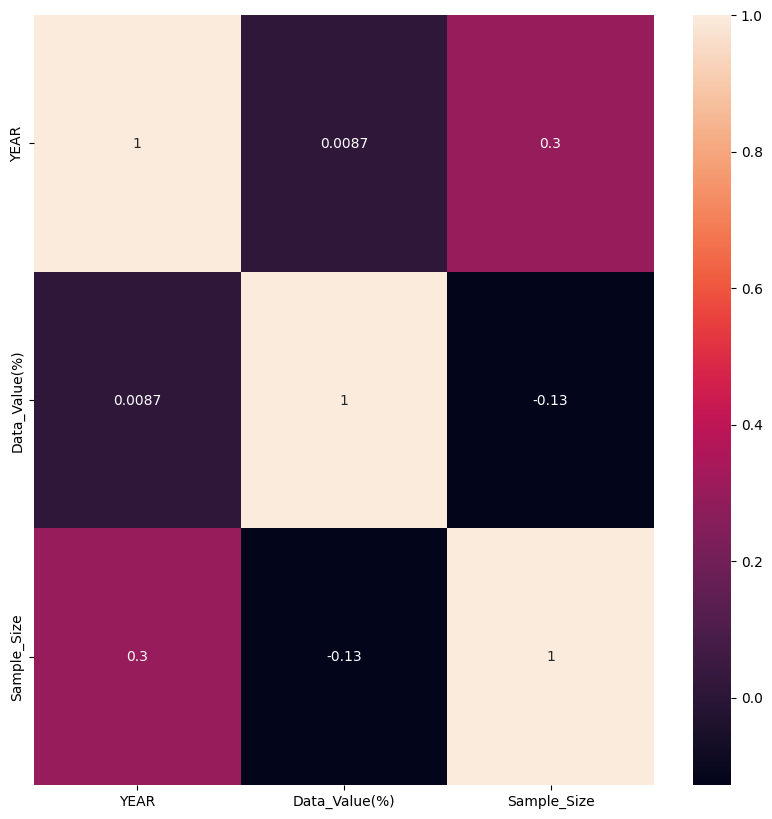

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True) # draw heatmap
plt.show()